Importing dependencies

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Collection and Processing

In [11]:
#loading dataset to a pandas dataframe
sonar_data = pd.read_csv("Copy of sonar data.csv",header=None)

In [12]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [13]:
X = sonar_data.iloc[:, :-1]   # All rows, all columns except last (features)
Y = sonar_data.iloc[:, -1]    # All rows, last column (labels)


In [14]:
#no of rows and columns
sonar_data.shape

(208, 61)

In [15]:
print(X.shape)
print(Y.shape)


(208, 60)
(208,)


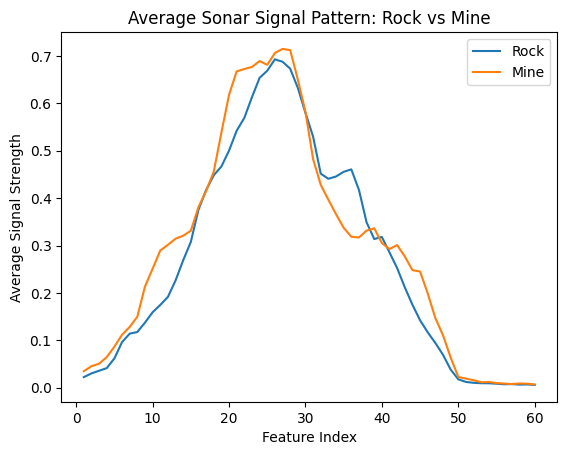

In [16]:
rock_mean = X[Y == 'R'].mean()
mine_mean = X[Y == 'M'].mean()

features = np.arange(1, X.shape[1] + 1)

plt.figure()
plt.plot(features, rock_mean, label='Rock')
plt.plot(features, mine_mean, label='Mine')

plt.xlabel("Feature Index")
plt.ylabel("Average Signal Strength")
plt.title("Average Sonar Signal Pattern: Rock vs Mine")
plt.legend()
plt.show()


In [17]:
# describe statistical measures of data
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [18]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

M = Mine

R = Rock

In [19]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [20]:
#separating data and labels
X = sonar_data.drop(columns=60, axis=1)
Y = sonar_data[60]

In [21]:
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and Test Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


Logistic Regression

In [24]:
model = LogisticRegression()

In [25]:
#Training model with data
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Evaluation

In [26]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [27]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [28]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [29]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


Making a Predictive System

In [30]:
input_data = (0.0250,0.0410,0.0485,0.0352,0.0820,0.0915,0.1320,0.1480,0.2150,0.2380,
0.2650,0.2980,0.3120,0.2950,0.2780,0.3020,0.3450,0.3900,0.4450,0.4800,
0.5100,0.5250,0.5400,0.5600,0.5850,0.6000,0.6150,0.6200,0.5900,0.5500,
0.5100,0.4700,0.4300,0.3900,0.3500,0.3100,0.2750,0.2400,0.2100,0.1800,
0.1550,0.1300,0.1150,0.0980,0.0820,0.0650,0.0520,0.0410,0.0320,0.0250,
0.0200,0.0150,0.0100,0.0080,0.0060,0.0050,0.0040,0.0035,0.0030,0.0025)
#changing the i/p data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape np array for predicting one instance
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

probability = model.predict_proba(input_data_reshape)
mine_prob = probability[0][1]   # Probability of Mine

print(f"Mine Probability: {mine_prob:.4f}")

# 🔹 Threshold logic
if mine_prob > 0.6:
    print("\nThe object is a Rock")
elif mine_prob < 0.4:
    print("\nThe object is a Mine")
else:
    print("\nThe object is Unknown")

Mine Probability: 0.5901

The object is Unknown
